## 1. Variable Identification
- **ID Column**
    - status_id: The post's unique identification number
- **Date Column**
    - status_published: date and time of poster's status update - **(MM/DD/YYYY HH:MM)**
- **Numerical**
    - num_reactions - number of reactions to poster's post - **discrete**
    - num_comments - number of comments on poster's post - **discrete**
    - num_shares - number of times the poster's post was shared - **discrete**
    - num_likes - number of times the poster's post was liked - **discrete**
    - num_loves - number of times the poster's post was loved - **discrete**
    - num_wows - number of times the poster's post was wowed - **discrete**
    - num_hahas - number of times people laughed at the poster's post - **discrete**
    - num_sads - number of times people were saddened by the poster's post - **discrete**
    - num_angrys - number of times people were angered by the poster's post - **discrete**
- **Categorical**
    - status_type: Type of post - **nominal**
    
**Comments**
- Facebook inititially updated the like button to include 5 reactions (loves, wows, hahas, sads, and angrys). An additional one has since been added (cares). Also instead of telling you how many people liked Facebooks tells you how many reacted.

- SOURCE: https://www.wired.com/2016/02/facebook-reactions-totally-redesigned-like-button/
- SOURCE: https://techcrunch.com/2020/04/17/facebook-adds-new-care-emoji-reactions-on-its-main-app-and-in-messenger/


In [361]:
# ---------------------- import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt


In [362]:
# ----------------------- import dataset
data = pd.read_csv('C:\\Users\\Inno Mvula\\Desktop\\Goalcast\\Live.csv', usecols = [i for i in range(12)])
df = data[:]

In [363]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [364]:
# ----------------------- Rename columns for clarity

df.columns = ['status_id', 'status_type', 'status_published', 'reactions',
       'comments', 'shares', 'likes', 'loves', 'wows',
       'hahas', 'sads', 'angrys']

In [365]:
# ----------------------- Group variables by types 
num_data = ['reactions', 'comments', 'shares', 'likes', 'loves', 'wows', 'hahas', 'sads', 'angrys']
cat_data = 'status_type'
idn = 'status_id'
date = 'status_published'

In [366]:
df.head()

,status_id,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


**Comments**
- status_id is a combination of two numbers separated by an underscore. My guess is that the first number indicates the Poster's unique ID and the second would be the id of the post (posterID_postID)
- Reactions column must be the sum of all the individual reaction columns.

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   reactions         7050 non-null   int64 
 4   comments          7050 non-null   int64 
 5   shares            7050 non-null   int64 
 6   likes             7050 non-null   int64 
 7   loves             7050 non-null   int64 
 8   wows              7050 non-null   int64 
 9   hahas             7050 non-null   int64 
 10  sads              7050 non-null   int64 
 11  angrys            7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


**Comments**
- The dataset consists of 12 columns and 7050 posts. Of the 12 columns, 9 are numerical, 1 categorical, 1 date column and 1 ID column.
- There are no missing values. But we should check for duplicates.

In [368]:
# ----------------------- check for and drop duplicates rows if any
df2 = df.drop_duplicates().reset_index(drop = True)
df2.tail()

,status_id,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
6994,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
6995,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
6996,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
6997,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0
6998,1050855161656896_1050858841656528,photo,9/10/2016 10:30,17,0,0,17,0,0,0,0,0


In [369]:
# ----------------------- Summary statistics of numerical variables
df2[num_data].describe()

,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


**Observations**
- The most common reaction appears to be likes, followed by loves, wows, hahas, sads, and then angrys.

# 2. Non-graphical univariate analysis
- Split status_id to confirm earlier thought and see if the data contains more than one users posts.
    - distribution of users
    - distribution of post ids
- We will confirm whether reactions is indeed the total number of the individual reactions
- Convert status published to date time and extract weekday
- Analysis of categorical variables and their distributions

### Analysis of status_id

In [370]:
#make a copy of the data
df3 = df2[:]
df3.head()

,status_id,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [371]:
# ------------------------- split data
df3[['posterID','postID']] = df3[idn].str.split("_",expand=True,)
df3.head()

C:\Users\Inno Mvula\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,status_id,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,posterID,postID
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,246675545449582,1649696485147474
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,246675545449582,1649426988507757
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,246675545449582,1648730588577397
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,246675545449582,1648576705259452
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,246675545449582,1645700502213739


In [372]:
df4 = df3[['posterID', 'postID', 'status_type', 'status_published', 'reactions',
       'comments', 'shares', 'likes', 'loves', 'wows',
       'hahas', 'sads', 'angrys']]
df4.head(1)

,posterID,postID,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
0,246675545449582,1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0


In [373]:
# -------------------------- check unique posterID
df4['posterID'].unique(), len(df4['posterID'].unique())

(array(['246675545449582', '134115277150304', '146481362756646',
        '117059915488335', '848451358648417', '725980084255106',
        '614855718638584', '819700534875473', '1050855161656896'],
       dtype=object),
 9)

In [374]:
# ------------------------ Number of posts per user
df4['posterID'].value_counts()

246675545449582     2635
614855718638584     1440
134115277150304     1212
1050855161656896     778
848451358648417      450
725980084255106      252
146481362756646      125
117059915488335       56
819700534875473       51
Name: posterID, dtype: int64

In [375]:
# -------------------------- check unique postID
len(df4['postID'].unique())

6997

In [376]:
df4['postID'].value_counts().loc[lambda x: x>1]

326883450762124    2
429583263825475    2
Name: postID, dtype: int64

In [377]:
df4[df4['postID'] == '429583263825475']

,posterID,postID,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
1408,246675545449582,429583263825475,photo,4/22/2014 5:43,537,16,1,537,0,0,0,0,0
1729,246675545449582,429583263825475,photo,9/11/2013 0:12,537,16,1,537,0,0,0,0,0


In [378]:
df4[df4['postID'] == '326883450762124']

,posterID,postID,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
1488,246675545449582,326883450762124,photo,2/14/2014 3:07,211,2,0,211,0,0,0,0,0
1698,246675545449582,326883450762124,photo,10/11/2013 8:23,211,2,0,211,0,0,0,0,0


**Comments**
- There are 9 distinct users in this data set with a varying number of posts
- There are 2 postIDs that appear more than once. These are the 2 different posts from the same user posted at different times for each post. Interesting enough there other than the time and date posted, the reactions are completely identical.
- In the interest of keeping things clear, I'm going to drop these rows. If there were many repeated posts I wouldn't drop because there would be something to learn if the number of likes changed on post depending on the time and date posted. However so few instances will not analysis of this aspect to be possible.

In [379]:
# ------------------------- drop repeated posts
df5 = df4[(df4['postID'] != '326883450762124') & (df4['postID'] != '429583263825475')].reset_index(drop = True)
df5.tail(1)

,posterID,postID,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
6994,1050855161656896,1050858841656528,photo,9/10/2016 10:30,17,0,0,17,0,0,0,0,0


In [380]:
df5.shape, df4.shape

((6995, 13), (6999, 13))

### Comparison of reactions column to sum of the individual reaction columns

In [381]:
# --------------------------- create a new column called total
df5['total'] = df5.iloc[:,7:13].sum(axis=1)
df5.head()

,posterID,postID,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,total
0,246675545449582,1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529
1,246675545449582,1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150
2,246675545449582,1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,227
3,246675545449582,1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,111
4,246675545449582,1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,213


In [382]:
# ------------------------- check if reactions = total
df5['reactions'].equals(df5['total'])

False

**Comments**
- There are some rows where the totals do not match the number of reactions. We will now check for those rows.

In [383]:
# -------------------- create a series that returns true if a row in the reactions column is equal to a row in the totals column
check = df5['reactions'] == df5['total']  
check.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [384]:
# -------------------- find the rows that do not match and append to a list
lst = []
for i in range(len(check)):
    if check[i] == False:
        lst.append(i)
    else:
        pass
lst, len(lst)

([238, 247, 248, 251, 253, 254, 256, 257, 293], 9)

In [385]:
# ---------------------We will now have a look at each row
df5.iloc[lst,]

,posterID,postID,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,total
238,246675545449582,1331955210254938,video,6/25/2017 7:42,885,462,26,659,220,0,2,0,0,881
247,246675545449582,1320853268031799,photo,6/13/2017 23:17,264,2,0,256,2,5,0,0,0,263
248,246675545449582,1319907678126358,photo,6/13/2017 1:31,313,3,0,297,7,6,0,0,0,310
251,246675545449582,1319045328212593,photo,6/12/2017 5:08,247,6,0,234,9,1,0,0,0,244
253,246675545449582,1318160668301059,photo,6/11/2017 7:04,387,3,0,368,16,1,0,0,0,385
254,246675545449582,1317164368400689,photo,6/10/2017 8:19,178,9,0,170,6,0,0,0,0,176
256,246675545449582,1316848781765581,photo,6/10/2017 1:08,270,3,0,256,10,3,0,0,0,269
257,246675545449582,1315331711917288,photo,6/8/2017 9:26,351,4,1,344,6,0,0,0,0,350
293,246675545449582,1262985247151935,video,4/20/2017 2:36,616,523,21,459,125,21,8,0,1,614


**comments**
- There are 9 rows in the total column that do not match the values in the reactions column. Not much difference in the values, with most being 1-4 counts shorter.
- As there are only a few mismatached rows they will be dropped. The loss of these rows shouldn't affect the models predictive models we build in a later section. 

In [386]:
# --------------------- drop mismatched rows from data
df6 = df5.drop(lst).reset_index(drop=True)
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   posterID          6986 non-null   object
 1   postID            6986 non-null   object
 2   status_type       6986 non-null   object
 3   status_published  6986 non-null   object
 4   reactions         6986 non-null   int64 
 5   comments          6986 non-null   int64 
 6   shares            6986 non-null   int64 
 7   likes             6986 non-null   int64 
 8   loves             6986 non-null   int64 
 9   wows              6986 non-null   int64 
 10  hahas             6986 non-null   int64 
 11  sads              6986 non-null   int64 
 12  angrys            6986 non-null   int64 
 13  total             6986 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 764.2+ KB


### Convert status_published to datetime
- The most interesting data we can get from the date is the day posted and the time posted. Then we can later analyse what the best days to post are.

In [387]:
#make a copy of the data
df7 = df6[:]
df7.head(1)

,posterID,postID,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,total
0,246675545449582,1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529


In [388]:
df7['date'] = pd.to_datetime(df7['status_published'])

<ipython-input-388-acb09d3cba72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['date'] = pd.to_datetime(df7['status_published'])


In [389]:
df7['weekday'], df7['time'] = df7['date'].dt.dayofweek, df7['date'].dt.time

<ipython-input-389-4dd7ec94376c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['weekday'], df7['time'] = df7['date'].dt.dayofweek, df7['date'].dt.time


In [390]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   posterID          6986 non-null   object        
 1   postID            6986 non-null   object        
 2   status_type       6986 non-null   object        
 3   status_published  6986 non-null   object        
 4   reactions         6986 non-null   int64         
 5   comments          6986 non-null   int64         
 6   shares            6986 non-null   int64         
 7   likes             6986 non-null   int64         
 8   loves             6986 non-null   int64         
 9   wows              6986 non-null   int64         
 10  hahas             6986 non-null   int64         
 11  sads              6986 non-null   int64         
 12  angrys            6986 non-null   int64         
 13  total             6986 non-null   int64         
 14  date              6986 n

In [391]:
df7.head(1)

,posterID,postID,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,total,date,weekday,time
0,246675545449582,1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,2018-04-22 06:00:00,6,06:00:00


### Analysis of categorical variables

In [392]:
# ----------------------- Number of unique values in the status_type column
df7[cat_data].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

## **Comments**
- The status_type column contains 4 different types of posts.
    - Photos
    - Videos
    - Status - I believe this refers to posts that are written text
    - Links
- SOURCE: https://www.practicalecommerce.com/Understanding-the-6-Facebook-Post-Types

In [393]:
# ----------------------- unique values in categorical variables
df7[cat_data].value_counts()

photo     4233
video     2331
status     359
link        63
Name: status_type, dtype: int64

In [394]:
df7['weekday'].value_counts()

6    1048
1    1036
4    1000
0     986
5     974
2     972
3     970
Name: weekday, dtype: int64

**Comments**
- Most common post type is photos
- I'm surprised to see that there isn't a large disparity in the days people choose to post. Tuesday and Sunday are surprising the most popular days to post.
- Will try and see what the distribution is like per user

# 3. Graphical univariate analysis

Text(0.5, 0.98, 'Distribution of Post Types')

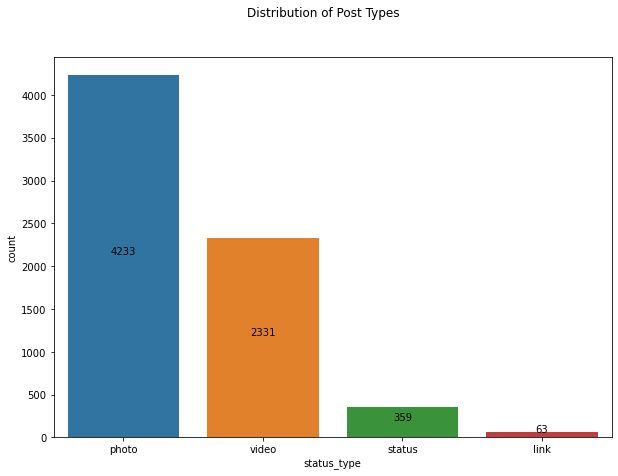

In [395]:
# ----------------------- Graph of unique values in status type
plt.figure(figsize=(10, 7))
tplot = sns.countplot(x = df7['status_type'], order = df7['status_type'].value_counts().index)
for p in tplot.patches:
    tplot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()/2), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.suptitle("Distribution of Post Types")

Text(0.5, 0.98, 'Distribution of Weekdays')

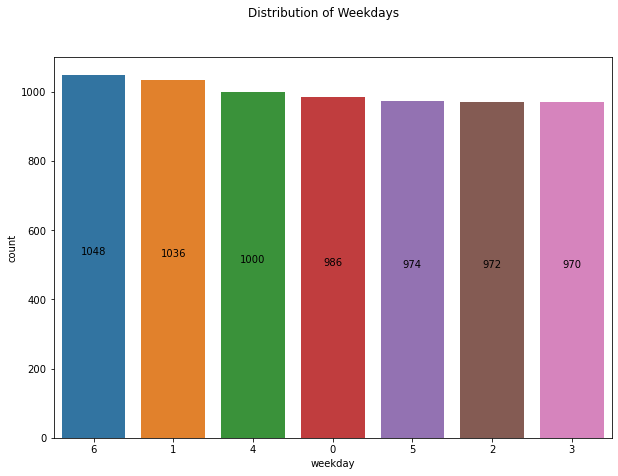

In [396]:
# ----------------------- Graph of unique values in status type
plt.figure(figsize=(10, 7))
tplot = sns.countplot(x = df7['weekday'], order = df7['weekday'].value_counts().index)
for p in tplot.patches:
    tplot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()/2), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.suptitle("Distribution of Weekdays")

# 4. Multivariate Analysis
- In this section we will look at the following
    - Engagement metrics by frequency
    - Correlation between numerical variables
    - Relationships between post types and numerical variables
    - Whether there is a relationship between time of posting and number of reactions, comments and shares

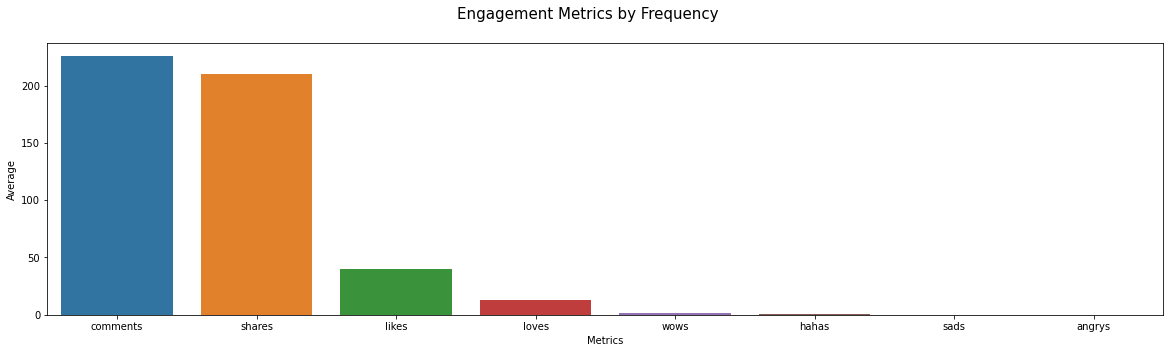

In [397]:
plt.figure(figsize=(20,5))
eplot = df7[['comments', 'shares', 'likes', 'loves', 'wows', 'hahas', 'sads', 'angrys']].mean()
sns.barplot(x = eplot.index, y = eplot, order=eplot.values[::-1].sort())
plt.suptitle('Engagement Metrics by Frequency', fontsize = 15)
plt.ylabel('Average')
plt.xlabel('Metrics')
plt.savefig("engagementmetrics.png", dpi=100)

### Correlation

In [398]:
num_data

['reactions',
 'comments',
 'shares',
 'likes',
 'loves',
 'wows',
 'hahas',
 'sads',
 'angrys']

In [399]:
# ----------------------- Correlation matrix of numerical variables
corr = df7[num_data].corr()

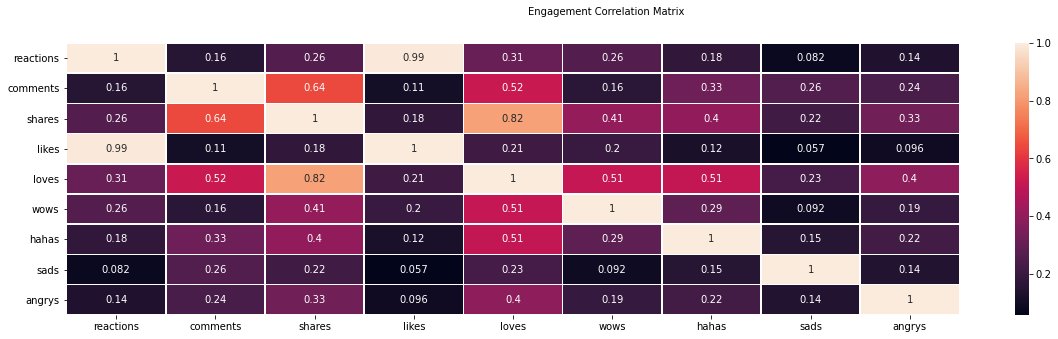

In [400]:
plt.figure(figsize=(20,5))
plt.suptitle("Engagement Correlation Matrix", fontsize = 10)
sns.heatmap(corr, annot = True, linewidths=.5)
plt.savefig("engagementmatrix.png", dpi=100)

**Observations**
- There are not many strong correlations between the numerical variables except a few
- Interesting enough, there is a strong correlation between loves and shares
- There is also an almost 1-1 correlation between reactions and likes, which is expected as likes are a subset of reactions and make up the majority of reactions most of the time.

### Relationship between post type and numerical variables
- We're interested in seeing what types of posts get certain reactions, comments and shares
- Compare average reactions received per post.

In [401]:
num_data

['reactions',
 'comments',
 'shares',
 'likes',
 'loves',
 'wows',
 'hahas',
 'sads',
 'angrys']

In [402]:
def react_avg(rtype):
    fig, axes = plt.subplots(3, 3, figsize=(30, 15))
    fig.suptitle("Post Engagements", fontsize = 30)
    axes = axes.flatten()
    for item, axe in zip(rtype, axes):
        dplot = df7.groupby('status_type')[item].mean()
        bplot = sns.barplot(x = dplot.index, y = dplot, ax = axe)
        for p in bplot.patches:
            bplot.annotate(f"{round(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()/2), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        axe.tick_params(labelrotation=45)
        plt.tight_layout()

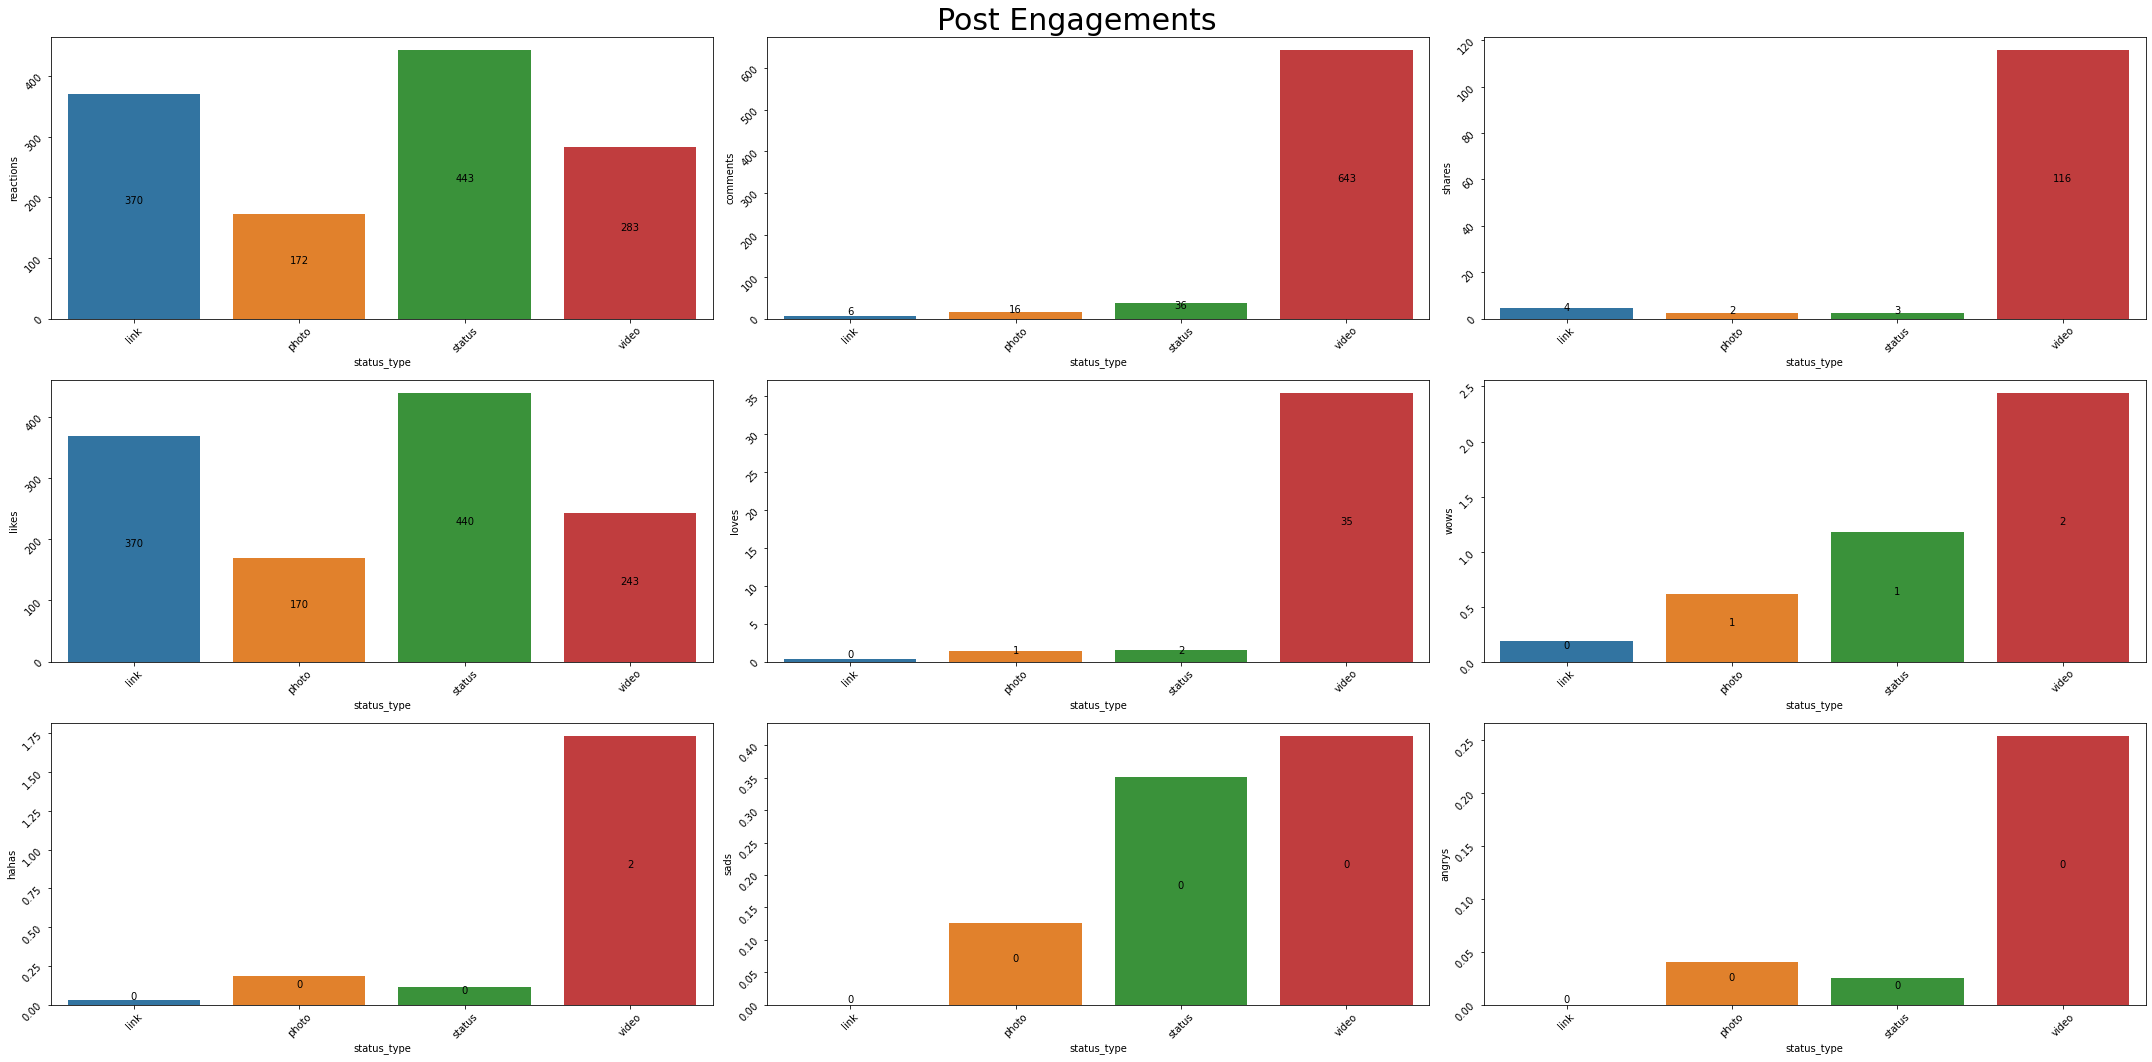

In [403]:
react_avg(num_data)
plt.savefig("pstengagements.png", dpi=100)

**Comments**
- When we break down the type of engagements each type of post receives. Videos get the most comments, shares, loves, wows, hahas, sads, and angrys.
- As for total reactions and likes, status posts receive the most on average, followed by links, videos the photos.

### Relationship between time of posting and number of reactions

In [404]:
def peak_time(ptype):
    fig, axes = plt.subplots(3, 3, figsize=(25, 25))
    fig.suptitle("Popular Engagement Times", fontsize=16)
    axes = axes.flatten()
    for item, axe in zip(ptype, axes):
        df7.plot(x = 'time', y = item, figsize=(20, 10), ax =axe)
#         plt.ylabel('# of Reactions')
#         plt.xlim(["00:00:00", "23:59:59"])
        axe.tick_params(labelrotation=45)
        plt.tight_layout()

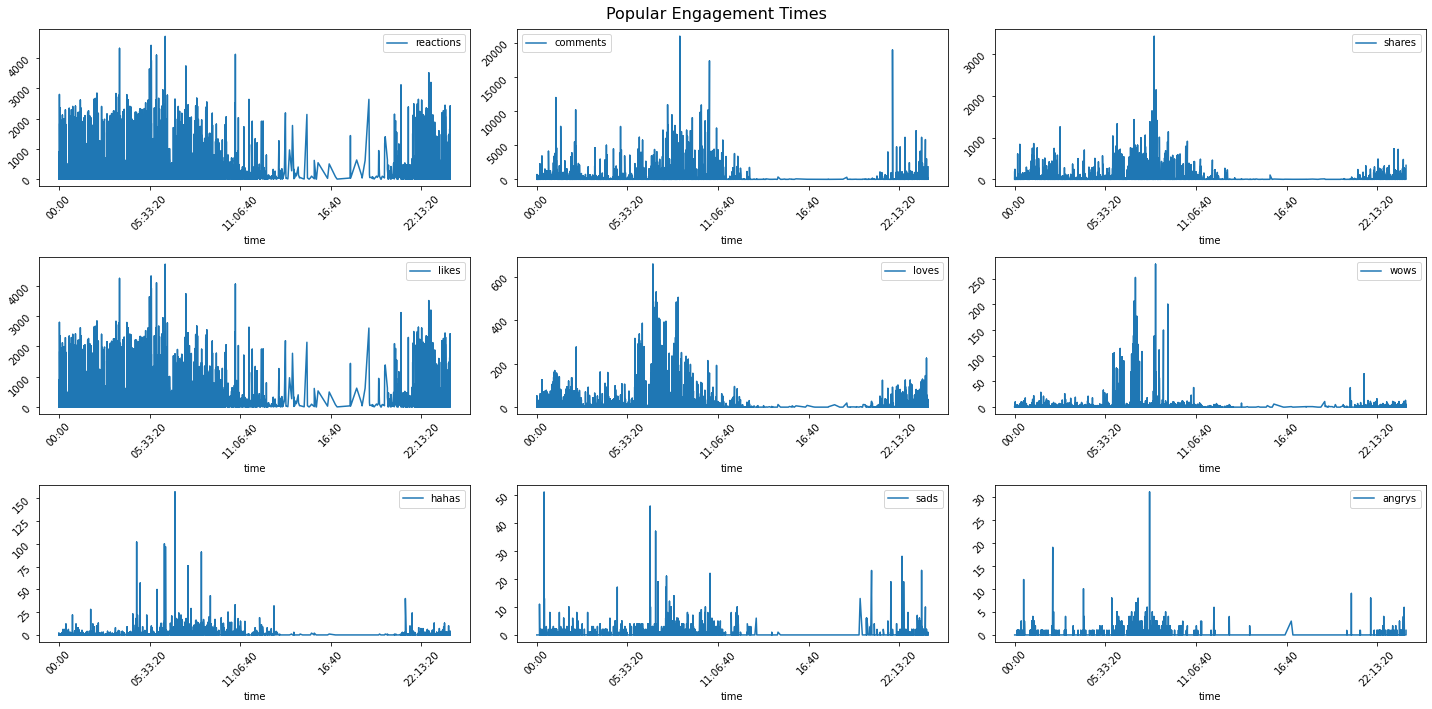

In [405]:
peak_time(num_data)
plt.savefig("engagementTimes.png", dpi=100)

**Comments**
- In all areas of engagements, the most popular times are between 5:30am and 11:00am. I'm not sure why this is as this is pretty early in the morning, but I'm assuming most engagements are not local.
- The time period between 11:00am and 20:00pm is where we see the lowest engagements most of the time. And engagements then rise slightly after that until they peak again in the early mornings.

### Relationship between day of posting and reactions

In [406]:
def react_avg_day(adtype):
    fig, axes = plt.subplots(3, 3, figsize=(30, 15))
    fig.suptitle("Popular Days for Engagements", fontsize = 30)
    axes = axes.flatten()
    for item, axe in zip(adtype, axes):
        dplot = df7.groupby('weekday')[item].mean()
        bplot = sns.barplot(x = dplot.index, y = dplot, ax = axe)
        for p in bplot.patches:
            bplot.annotate(f"{round(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()/2), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        axe.tick_params(labelrotation=45)
        plt.tight_layout()
#     plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)

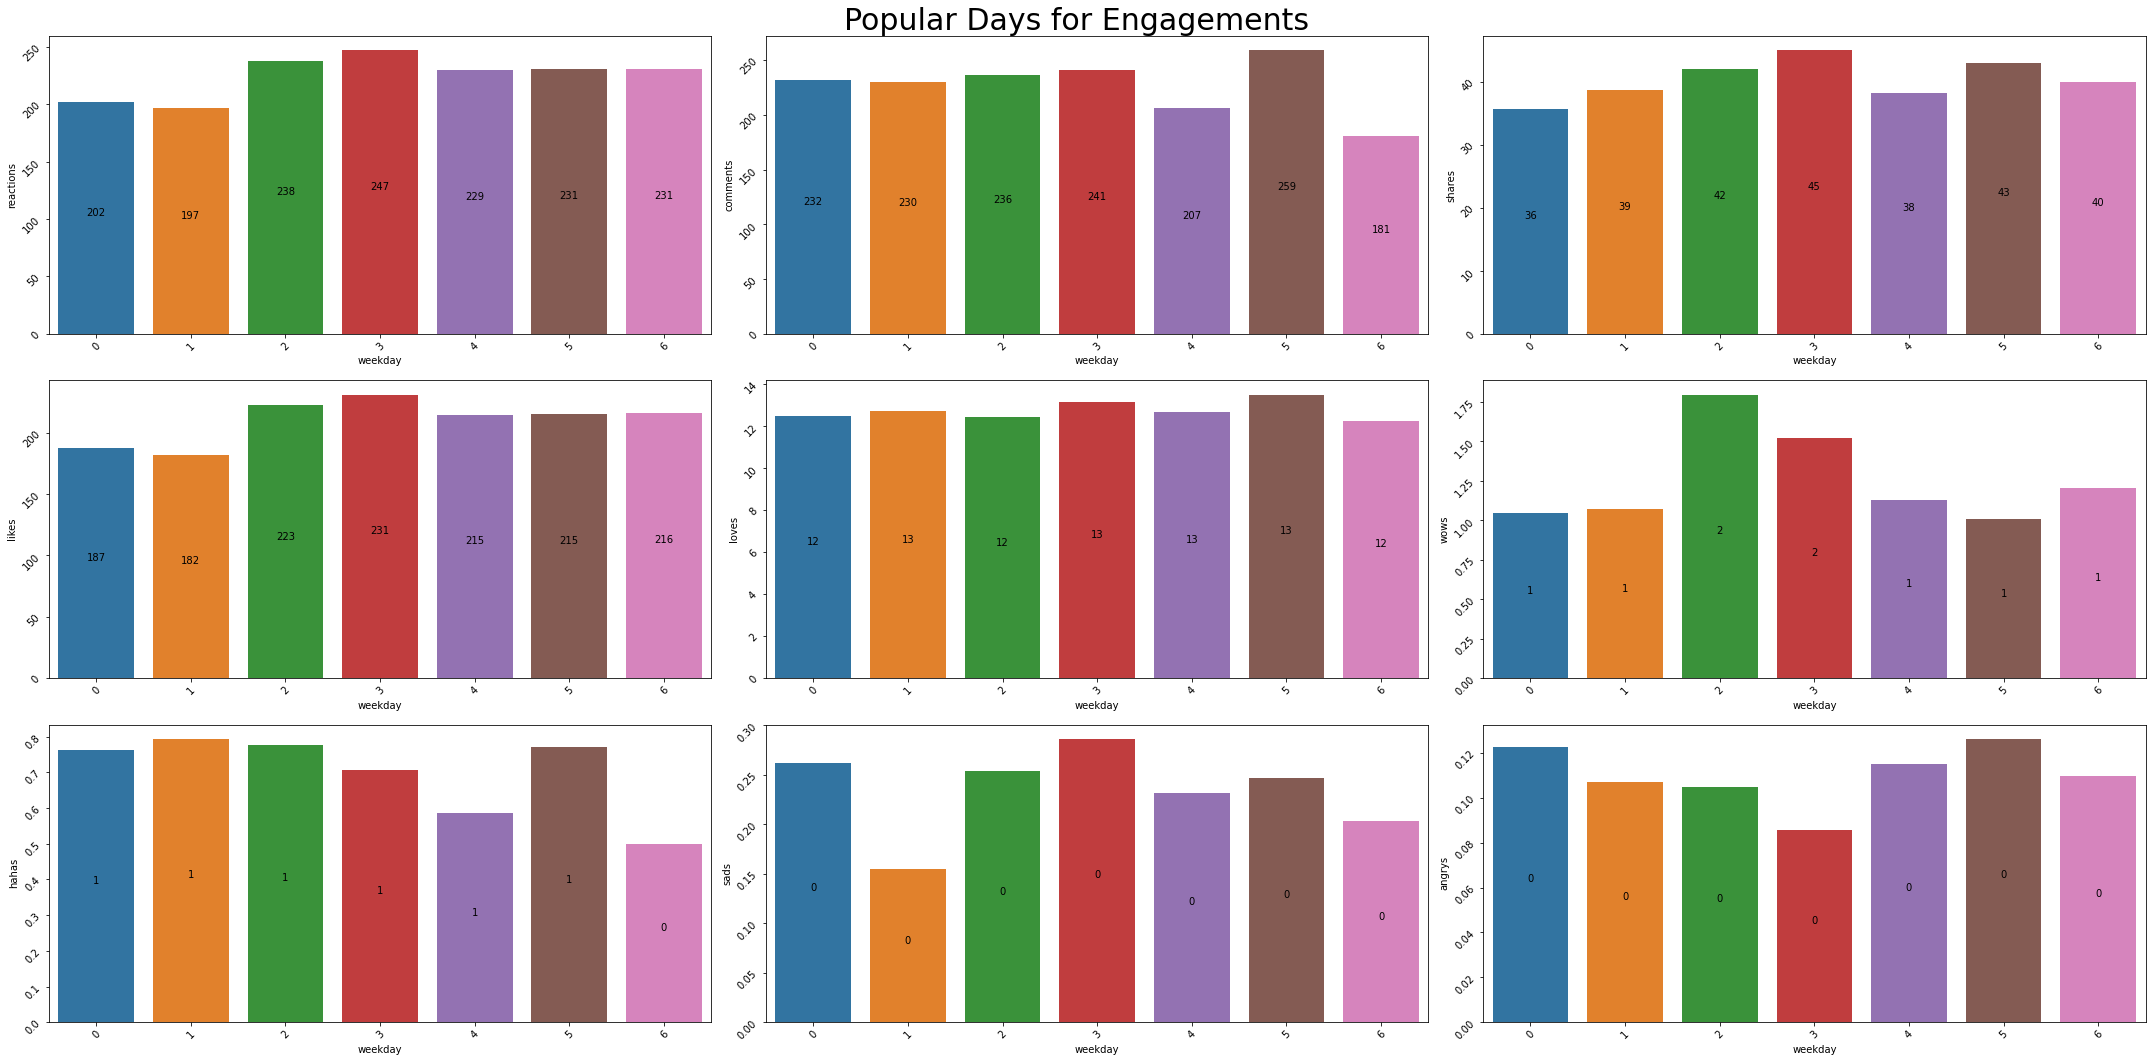

In [407]:
react_avg_day(num_data)
plt.savefig("engagementdays.png", dpi=100)

**Comments**
- There does not appear to be any significant differences in engagements on different days.
- However Wednesdays, Thursdays, and Saturdays do appear to be the slightly more popular days for engagements.

# 5. Predictive Modelling
- Main task
    - Train models to predict total engagements.
    - This is a regression task as we will be trying to predict number of engagements.
    - Evaluation and valuation of models
- Other tasks
    - Prepare dataset for machine learning
        - Encoding of categorical variables
        - Feature engineering
- Models
    - Linear Regression
    - Lasso Regression
    - Ridge Regression
    - Support Vector Machines
    - KNN regressor
    - Random Forest Regressor
    - Gradient Boosting Regressor
    - XgBoost Regressor
    - MLP
    

## 1. Prepare Our Dataset
- Create a target variable
- Drop redundant or unnecessary columns
    - PostID - No patterns to be learned from, as each row is completely different from the rest
    - Total - already confirmed it equals reactions so its redundant.
    - Date - Machine learning models do not work well with datetime data. Will have to split during engineering
    - Time - will have to split into hours, minutes and seconds
    - status_published - redundant, same as date
    - reactions - In regression its very important that the predictors are not correlated with each other. reactions is highly correlated with likes so it will be dropped.
- Encode status-type
    - Machine learning models do not work well with strings so we will categorical columns with strings to integers.
- Split dataset into test and training sets

### Target Variable
- I am of the opinion that comments and shares are more important metrics for engagements than reactions. Likes are a very simple click of a button and can happen accidently sometimes. The post may be little nothing more than afterthought after the like. On the other hands, comments and shares require a consious effort to engage with the post. By commenting you spend a little more time on the post, having to type out your opinion, meaning you have to take a little more time to think about it. ALso by commenting you not only engage with the poster but other commenters as well and create a discussion. Similarly by sharing a post it spreads from one audience to the next, therefore expanding its reach. Sharing invites more interactions the larger the audience gets.
- So for the target variable i'm interest in looking at will be the sum of comments and shares. And we will be trying to predict how likely a post will be shared or commented on, based on the day, post type, and reactions.

In [408]:
df7['commentOrShare'] = df7.iloc[:,5:7].sum(axis=1)
df7.head(1)

<ipython-input-408-12452556238c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['commentOrShare'] = df7.iloc[:,5:7].sum(axis=1)


,posterID,postID,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,total,date,weekday,time,commentOrShare
0,246675545449582,1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,2018-04-22 06:00:00,6,06:00:00,774


### Drop columns

In [409]:
df8 = df7[['posterID', 'status_type', 'likes', 'loves', 'wows',
       'hahas', 'sads', 'angrys', 'weekday', 'commentOrShare']]

In [410]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   posterID        6986 non-null   object
 1   status_type     6986 non-null   object
 2   likes           6986 non-null   int64 
 3   loves           6986 non-null   int64 
 4   wows            6986 non-null   int64 
 5   hahas           6986 non-null   int64 
 6   sads            6986 non-null   int64 
 7   angrys          6986 non-null   int64 
 8   weekday         6986 non-null   int64 
 9   commentOrShare  6986 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 545.9+ KB


### Encoding
- OneHot encoding will be used. This creates a new column for each label. The benefit of this is that more features are added which will improve performance. On the other hand we also don't want the dataset to get too large, then we get the problem of dimensionality.

In [411]:
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_<{self.categories_[i][j]}>')
                j += 1
        return new_columns

In [412]:
enc =  OneHotEncoder()

In [413]:
enc_data = enc.fit_transform(df8[['posterID', 'status_type', 'weekday']])

In [414]:
enc_data.head()

,posterID_<1050855161656896>,posterID_<117059915488335>,posterID_<134115277150304>,posterID_<146481362756646>,posterID_<246675545449582>,posterID_<614855718638584>,posterID_<725980084255106>,posterID_<819700534875473>,posterID_<848451358648417>,status_type_<link>,status_type_<photo>,status_type_<status>,status_type_<video>,weekday_<0>,weekday_<1>,weekday_<2>,weekday_<3>,weekday_<4>,weekday_<5>,weekday_<6>
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Comments**
- For the one-hot encoding, collinearity issues arise since our predictors are now linearly dependent on each other. So one column from each category will be dropped.

In [415]:
enc_data2 = enc_data.drop(['posterID_<1050855161656896>', 'status_type_<link>', 'weekday_<0>'], axis = 1)
enc_data2.head(1)

,posterID_<117059915488335>,posterID_<134115277150304>,posterID_<146481362756646>,posterID_<246675545449582>,posterID_<614855718638584>,posterID_<725980084255106>,posterID_<819700534875473>,posterID_<848451358648417>,status_type_<photo>,status_type_<status>,status_type_<video>,weekday_<1>,weekday_<2>,weekday_<3>,weekday_<4>,weekday_<5>,weekday_<6>
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [416]:
df9 = df8.drop(['posterID', 'status_type', 'weekday'], axis = 1)
df9.head(1)

,likes,loves,wows,hahas,sads,angrys,commentOrShare
0,432,92,3,1,1,0,774


In [417]:
df10 = pd.concat([enc_data2, df9], axis = 1)
df10.head(1)

,posterID_<117059915488335>,posterID_<134115277150304>,posterID_<146481362756646>,posterID_<246675545449582>,posterID_<614855718638584>,posterID_<725980084255106>,posterID_<819700534875473>,posterID_<848451358648417>,status_type_<photo>,status_type_<status>,...,weekday_<4>,weekday_<5>,weekday_<6>,likes,loves,wows,hahas,sads,angrys,commentOrShare
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,432,92,3,1,1,0,774


### Split dataset
- We're first going to split the dataset into training and test.
- Then we will split training into a training and validation set.

In [418]:
#Libraries for Model Building and Evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split
#set random seed to produce reproducible results
from numpy.random import seed
seed(1)

In [419]:
features = df10.iloc[:, 0: 23]
target = df10.iloc[:, 23]

In [420]:
#split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle = True)

In [421]:
len(X_train), len(X_test), len(y_train), len(y_test)

(5588, 1398, 5588, 1398)

In [422]:
#Split Feature_train/target_train to training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle = True)

In [423]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4191, 1398, 4191, 1398)

### 3. Feature Scaling
- Scaling makes the covariates unit-less allowing for them to contribute to the MSE on equal scale. Without scaling larger values will be given more weight and thus skew the data.
- To handle this issue we will scale all the numerical variables other than the target to values between 0 and 1.

In [424]:
#Feature Scaling
#This is a very important step in machine learning. It helps the algorithm quickly learn a better solution to the problem.
from sklearn.preprocessing import MinMaxScaler

In [425]:
# Slice desired variables from both X_train and X_test
X_train_num, X_test_num = X_train.iloc[:, 17:], X_test.iloc[:, 17:]

In [426]:
xscaler = MinMaxScaler()
X_train_norm = xscaler.fit_transform(X_train_num)
X_test_norm = xscaler.transform(X_test_num)

In [427]:
xtrain_df = pd.DataFrame(X_train_norm, columns = ['likes', 'loves', 'wows',
       'hahas', 'sads', 'angrys'])
xtrain_df.head(1)

,likes,loves,wows,hahas,sads,angrys
0,0.00896,0.0,0.0,0.0,0.0,0.0


In [428]:
xtest_df = pd.DataFrame(X_test_num, columns = ['likes', 'loves', 'wows',
       'hahas', 'sads', 'angrys'])
xtest_df.head(1)

,likes,loves,wows,hahas,sads,angrys
3499,225,19,2,3,0,0


In [429]:
X_train_norm = pd.concat([X_train.iloc[:, 0:17].reset_index(drop = True), xtrain_df], axis =1)

In [430]:
X_test_norm = pd.concat([X_test.iloc[:, 0:17], xtest_df], axis =1).reset_index(drop = True)

In [431]:
# # Target Scaler
# yscaler = MinMaxScaler()
# y_train_norm = yscaler.fit_transform(y_train.values.reshape(-1,1))
# y_test_norm = yscaler.transform(y_test.values.reshape(-1,1))

## 2. Train our models
- Task: Regression
    - Linear Regression
    - Lasso Regression
    - Support vector machine
    - Random Forest
    - Gradient Boost Regressor

In [432]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [433]:
lr = LinearRegression()
las = linear_model.Lasso()
svr = SVR()
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()


### Model fitting - Base Parameters

#### Linear Regression

In [434]:
lr.fit(X_train_norm, y_train)

LinearRegression()

In [435]:
y_pred1 = lr.predict(X_test_norm)

In [436]:
#evaluate

print('R2 Score:', metrics.r2_score(y_test, y_pred1))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

R2 Score: -257745.96027513742
Mean Absolute Error: 198768.9316796112
Mean Squared Error: 220107743651.06656
Root Mean Squared Error: 469156.41704133875


#### Lasso Regression

In [437]:
las.fit(X_train_norm, y_train)

Lasso()

In [438]:
y_pred2 = las.predict(X_test_norm)

In [439]:
#evaluate

print('R2 Score:', metrics.r2_score(y_test, y_pred2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

R2 Score: -197446.5662174205
Mean Absolute Error: 160834.2502789558
Mean Squared Error: 168613970240.88654
Root Mean Squared Error: 410626.31459867075


#### Support Vector Machine

In [440]:
svr.fit(X_train_norm, y_train)

SVR()

In [441]:
y_pred3 = svr.predict(X_test_norm)

In [442]:
#evaluate

print('R2 Score:', metrics.r2_score(y_test, y_pred3))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

R2 Score: -0.07909628942089819
Mean Absolute Error: 284.787398271673
Mean Squared Error: 921514.0663274134
Root Mean Squared Error: 959.9552418354792


#### Random Forest

In [443]:
rf.fit(X_train_norm, y_train)

RandomForestRegressor()

In [444]:
y_pred4 = rf.predict(X_test_norm)

In [445]:
#evaluate

print('R2 Score:', metrics.r2_score(y_test, y_pred4))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

R2 Score: -2.366155234471117
Mean Absolute Error: 992.1066936458483
Mean Squared Error: 2874589.9957375145
Root Mean Squared Error: 1695.461587809501


#### Gradient Boost

In [446]:
gbr.fit(X_train_norm, y_train)

GradientBoostingRegressor()

In [447]:
y_pred5 = gbr.predict(X_test_norm)

In [448]:
#evaluate

print('R2 Score:', metrics.r2_score(y_test, y_pred5))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred5))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred5))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

R2 Score: -0.9916116318447163
Mean Absolute Error: 808.7546242617769
Mean Squared Error: 1700773.277972368
Root Mean Squared Error: 1304.136985892344


#### Cross Validation

In [449]:
lol = [lr, las, svr, rf, gbr]
for val in lol:
    scores = cross_val_score(val, X_val, y_val, cv=10, scoring = 'r2')
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.42 accuracy with a standard deviation of 0.21
0.43 accuracy with a standard deviation of 0.21
-0.08 accuracy with a standard deviation of 0.03
0.52 accuracy with a standard deviation of 0.20
0.55 accuracy with a standard deviation of 0.15


## Hyper Parameter Tuning
- We will only focus on the base model that produced the best results after validating

In [450]:
#Parameters
num_est = []
min_ss = []
min_sl =[]
max_dep = []
for i in range(100, 900, 100):
    num_est.append(i)
for l in range(0, 7, 1):
    min_ss.append(l)
for k in range(0, 6, 1):
    min_sl.append(k)
#for n in range(1, 10, 1):
#    max_dep.append(n)
#max_dep.append(None)
parameters = {
    "n_estimators":num_est,
    "min_samples_split": min_ss,
    "min_samples_leaf": min_sl,
    "max_features": [2, 3, 4, "sqrt", "log2"],
#    "max_depth": max_dep,
    "learning_rate": [0.01, 0.02, 0.1, 0.2, 0.001]
}
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
 'min_samples_split': [0, 1, 2, 3, 4, 5, 6],
 'min_samples_leaf': [0, 1, 2, 3, 4, 5],
 'max_features': [2, 3, 4, 'sqrt', 'log2'],
 'learning_rate': [0.01, 0.02, 0.1, 0.2, 0.001]}

In [451]:
#Import randomized search
from sklearn.model_selection import RandomizedSearchCV
rclf = RandomizedSearchCV(gbr, parameters, n_iter = 100, cv = 3, random_state = 42)
rclf.fit(X_train_norm, y_train)

C:\Users\Inno Mvula\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Inno Mvula\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Inno Mvula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Inno Mvula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Inno Mvula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Inno Mvula\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   param_distributions={'learning_rate': [0.01, 0.02, 0.1, 0.2,
                                                          0.001],
                                        'max_features': [2, 3, 4, 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [0, 1, 2, 3, 4, 5],
                                        'min_samples_split': [0, 1, 2, 3, 4, 5,
                                                              6],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   random_state=42)

In [452]:
rclf.best_params_

{'n_estimators': 400,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'learning_rate': 0.1}

In [453]:
y_pred6 = rclf.predict(X_test_norm)

In [454]:
#evaluate

print('R2 Score:', metrics.r2_score(y_test, y_pred6))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred6))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred6))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))

R2 Score: 0.022046253617371114
Mean Absolute Error: 512.06491316559
Mean Squared Error: 835141.536806522
Root Mean Squared Error: 913.8607863381172


In [455]:
rclf.best_score_

0.7045088887045797